In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import scipy
import random
import pylab as pl
from sklearn import datasets, svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import seaborn as sns; sns.set()
import pandas as pd

# Part 1: Visualize the raw data

In [2]:
dat=pd.read_csv( "/home/vagrant/capstoneProject/Analysis/HitterStatLines_awayStatsOnly_2010_2014.txt",sep="\t",index_col=0)
print dat.shape

(515, 7)


/opt/conda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


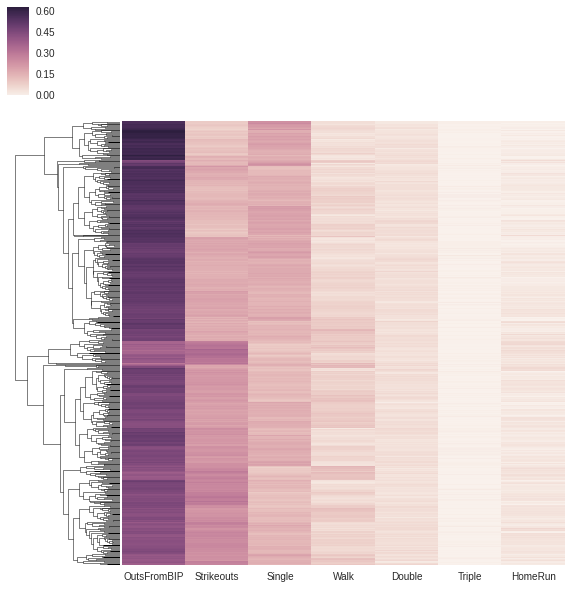

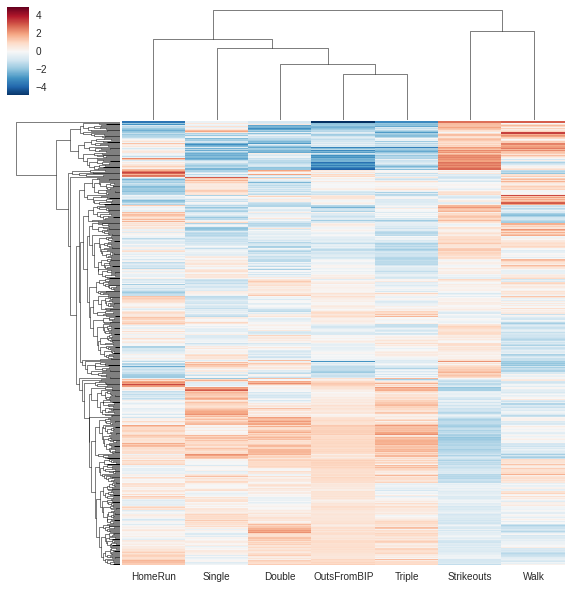

In [3]:
#normalize data by row and column:
dat_norm=dat.apply( lambda x: ( (x - np.mean(x))/np.std(x)   ), axis=1   )
dat_norm=dat_norm.apply( lambda x: (  (x - np.mean(x)) / np.std(x)   ), axis=0  )

#reorder the rows of the un-normalized data frame:
dat2 = dat[ ['OutsFromBIP', 'Strikeouts', 'Single', 'Walk',  'Double', 'Triple', 'HomeRun']  ]

# plot heatmaps:
sns.clustermap(dat2, col_cluster=False, yticklabels=False)
sns.clustermap(dat_norm, yticklabels=False)

# output the data to processed files, which can be imported with cluster 3.0 and visualized with tree view. 
# additionally, the cluster3.0 output will be used as input to bokeh heatmap, which requires that the 
# data be clustered before hand.
dat_norm.to_csv("/home/vagrant/capstoneProject/Analysis/data_normRowAndCol.txt" , sep="\t"   )
dat2.to_csv("/home/vagrant/capstoneProject/Analysis/data_noNorm.txt" , sep="\t")


# Part 2: Machine learning classifier

[0.34780548147336693, 0.22471078967037436, 0.18646522306973021, 0.22187705904805705, 0.20710539936974084, 0.18285931792890744, 0.16520340013601348, 0.1366452108364464, 0.13629246700071837, 0.12542994028153193, 0.10292685743572771, 0.13325995528318132, 0.10016028316038436, 0.12208879488913033, 0.11084161936691934, 0.071316718620405714, 0.055442586585823059, 0.02352932125369854, 0.029497373275984531, 0.079055025293859896, 0.047949444976471918, 0.04572772367345361, -0.0068126649638063398]
[0.39380222320567015, 0.29223135704289771, 0.25129618462689451, 0.24402278783949605, 0.23373023653851557, 0.22887419341069265, 0.22188851668523712, 0.21783379068589345, 0.21351622288808367, 0.19807669306837983, 0.20044765281189644, 0.18263701448570291, 0.18797292786636499, 0.1783783471419742, 0.18197508035407234, 0.17555588808066053, 0.184267091394792, 0.18474091453845881, 0.17580354528079942, 0.18606049642956976, 0.18071339806008263, 0.17990863985515249, 0.17265835017808054]


/opt/conda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


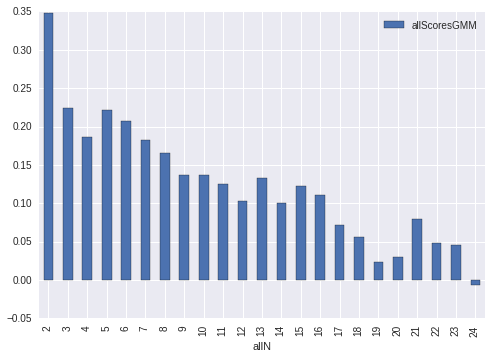

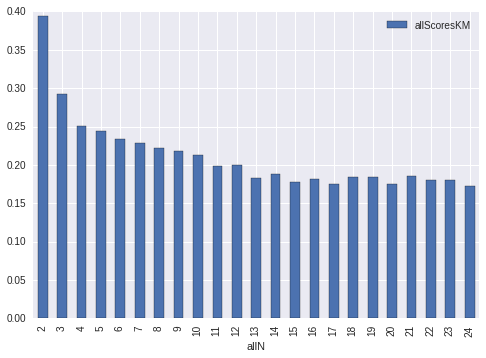

In [5]:
# use a gmm- compare gmm to a kmeans, using silhouette coef:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
from sklearn import cluster, mixture, datasets
import pandas as pd

# do some very basic feature engineering- add additional predictive features that will help separate hitter styles:
X=dat
X_conditional=X.copy(deep=True)
BIPrate=X['OutsFromBIP']+X['Single']+X['Double']+X['Triple']+X['HomeRun']
X_conditional['XBH_c_BIP'] = (X['Double']+X['Triple']+X['HomeRun'])/BIPrate
X_conditional['DoubleTriple_c_BIP'] = (X['Double']+X['Triple'])/BIPrate
X_conditional['Single_c_BIP'] = (X['Single'])/BIPrate
X_conditional['Double_c_BIP'] = (X['Double'])/BIPrate
X_conditional['Triple_c_BIP'] = (X['Triple'])/BIPrate
X_conditional['HomeRun_c_BIP'] = (X['HomeRun'])/BIPrate
X_conditional['Double_c_XBH'] = (X['Double'])/(X['Double']+X['HomeRun'])

#first identify the optimlal number of clusters:
allScoresGMM =[]
allScoresKM = []
allN =[]
for i in range(2,25):
    allScoresGMM.append( metrics.silhouette_score(X_conditional,  mixture.GMM(n_components=i, random_state=42).fit(X_conditional).predict(X_conditional), metric='euclidean') )
    allScoresKM.append(metrics.silhouette_score(X_conditional, cluster.KMeans(n_clusters=i, random_state=42).fit(X_conditional).labels_, metric='euclidean'))
    allN.append(i)
print allScoresGMM
print allScoresKM

pd.DataFrame({ 'allScoresGMM' : allScoresGMM , 'allN' : allN  }).plot(x="allN", y="allScoresGMM", kind="bar")
pd.DataFrame({ 'allScoresKM' : allScoresKM , 'allN' : allN  }).plot(x="allN", y="allScoresKM", kind="bar")



# Part 3: Manually inspect the clustersand their characteristics. Name and reorder as necessary

Counter({3: 199, 0: 172, 4: 54, 1: 45, 2: 45})
type 0 - Power and Patience 45
Strikeouts     0.295198
OutsFromBIP    0.398552
Walk           0.095674
Single         0.118886
Double         0.044697
Triple         0.002952
HomeRun        0.044042
dtype: float64
[114739 116662 123272 137140 150100 150289 150449 276055 285068 400134]
type 1 - Mixed Bag 199
Strikeouts     0.222780
OutsFromBIP    0.468299
Walk           0.078158
Single         0.146968
Double         0.046727
Triple         0.003861
HomeRun        0.033207
dtype: float64
[115229 115732 116338 116380 117244 117601 120074 120691 121347 133380]
type 2 - Lots of Contact, Little Power 172
Strikeouts     0.159803
OutsFromBIP    0.537737
Walk           0.065090
Single         0.168402
Double         0.046368
Triple         0.004779
HomeRun        0.017822
dtype: float64
[113028 115223 116539 116706 117276 120044 121074 121358 121409 123173]
type 3 - TONS of Contact, NO Power 54
Strikeouts     0.141155
OutsFromBIP    0.557534
Walk 

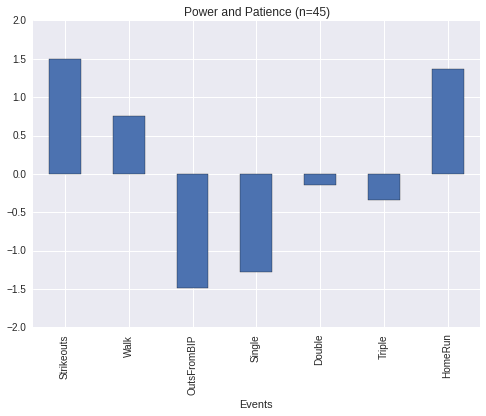

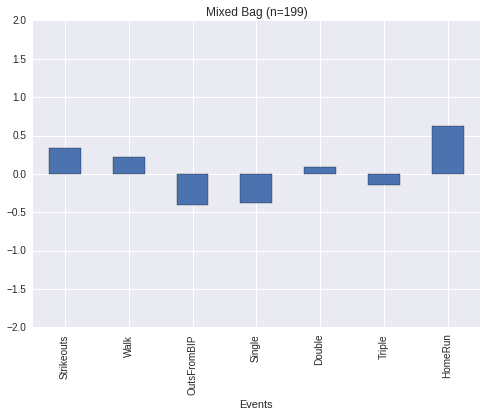

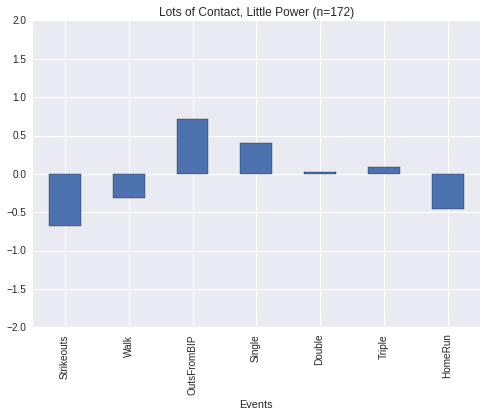

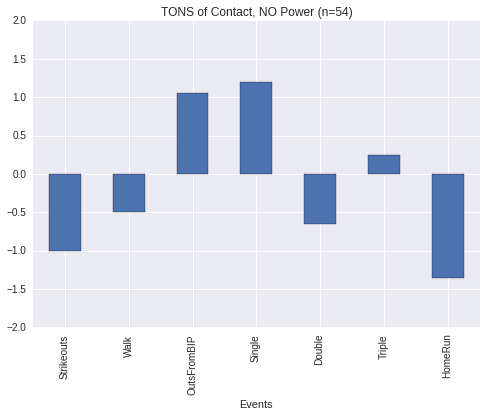

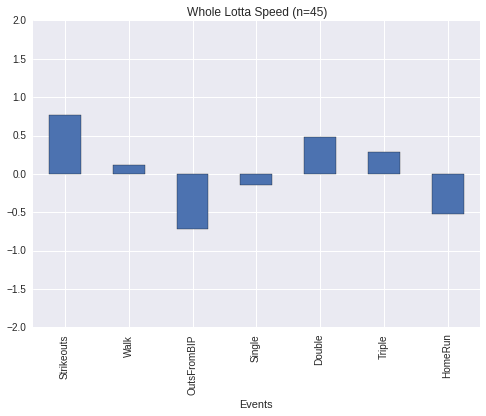

In [9]:
# A GMM is better, and for this algorithm (and with the additional features), n=5 seems to be a good choice. 
# so lets see how many samples are in each class for n=5:
from collections import Counter
n=5
modelLabels = mixture.GMM(n_components=n, random_state=42).fit(X_conditional).predict(X_conditional)
print Counter(modelLabels)

#############################
# get best class labels for each hitter do a reordering based on manual visualiation of class tendencies
#############################
#original order is 0=contact;1=speed;2=power;3=average;4=CONTACT
#new order is 0=power;1=average;2=contact;3=CONTACT;4=speed
modelLabels_REORDERED = []
for i in modelLabels:
    if i == 0:
        modelLabels_REORDERED.append(2)
    if i == 1:
        modelLabels_REORDERED.append(4)
    if i == 2:
        modelLabels_REORDERED.append(0)
    if i == 3:
        modelLabels_REORDERED.append(1)
    if i == 4:
        modelLabels_REORDERED.append(3)
modelLabels = np.asarray(modelLabels_REORDERED)

#############################
# get probablity weights for each hitter, and do the reordering as above:
#############################
gmmfit = mixture.GMM(n_components=n, random_state=42).fit(X_conditional)
probWeights = gmmfit.predict_proba(X_conditional)
probWeights = probWeights[ : , [2,3,0,4,1] ]
classMeans = probWeights.T.dot( X_conditional )[:, [0,1,2,3,4,5,6]]
classMeans.shape

#define color scheme and class names:
classes = ['Power and Patience',
           'Mixed Bag',
           'Lots of Contact, Little Power',
           'TONS of Contact, NO Power',             
           'Whole Lotta Speed']
classColors=['green','yellow','blue','black','red']
allCol =[]
for i in modelLabels:
    if i == 0:
        allCol.append('green')
    if i == 1:
        allCol.append('yellow')
    if i == 2:
        allCol.append('blue')
    if i == 3:
        allCol.append('black')
    if i == 4:
        allCol.append('red')


# print number of hitters and event probs for each cluster; 
# also print a few hitter IDs for each, to check them manaully on mlb.com      
print "type 0 - Power and Patience " + str(sum( modelLabels==0 ))
X_type0 = X[ modelLabels==0 ]
print X_type0.apply(np.mean, axis=0)
print X.index.values[modelLabels==0][:10]

print "type 1 - Mixed Bag " + str(sum( modelLabels==1 ))
X_type1 = X[ modelLabels==1 ]
print X_type1.apply(np.mean, axis=0)
print X.index.values[modelLabels==1][:10]

print "type 2 - Lots of Contact, Little Power " + str(sum( modelLabels==2 ))
X_type2 = X[ modelLabels==2 ]
print X_type2.apply(np.mean, axis=0)
print X.index.values[modelLabels==2][:10]

print "type 3 - TONS of Contact, NO Power " + str(sum( modelLabels==3 ))
X_type3 = X[ modelLabels==3]
print X_type3.apply(np.mean, axis=0)
print X.index.values[modelLabels==3][:10]

print "type 4 - Whole Lotta Speed " + str(sum( modelLabels==4 ))
X_type4 = X[ modelLabels==4]
print X_type4.apply(np.mean, axis=0)
print X.index.values[modelLabels==4][:10]


#############################
# plot the aggregate profiles of each of the n subtypes:  
#############################
from sklearn.preprocessing import normalize
classMeans_normed = normalize(classMeans, axis=1, norm='l1')

#create enrichment plots for each subclass- and reorder the columns firstto make it more intuitive:
X_reordered = X_conditional[ [0,2,1,3,4,5,6]  ].copy(deep=True)
classMeans_normed_reordered = pd.DataFrame(classMeans_normed)[ [0,2,1,3,4,5,6]   ].as_matrix()
events = X_reordered.columns.values

#these plots are the basis for the renaming and reordering scheme applied at top of this section
leagueWideMean = X_reordered.mean()
leagueWideStd = X_reordered.std()
for i in range(n):
    allZ = (classMeans_normed_reordered[i]-leagueWideMean)/leagueWideStd
    allZ
    p=pd.DataFrame({ 'Z Score for Event Type' : allZ , 'Events' : events  })
    p.plot(x="Events", y="Z Score for Event Type", kind="bar", ylim=(-2,2), 
           title= classes[i] + ' (n='   +  str(sum( modelLabels==i ))  + ')', legend = False )


# Part 4: PCA analysis using the labels derived from clustering and manual inspection

[  4.43236209e-01   1.83587827e-01   1.37809955e-01   9.25488014e-02
   7.99094410e-02   5.66363889e-02   4.83707499e-03   6.81126703e-04
   3.19165560e-04   2.41276329e-04   1.92733774e-04   2.01424822e-30
   8.34838018e-31   1.22899109e-32]
(515, 14)
515
515


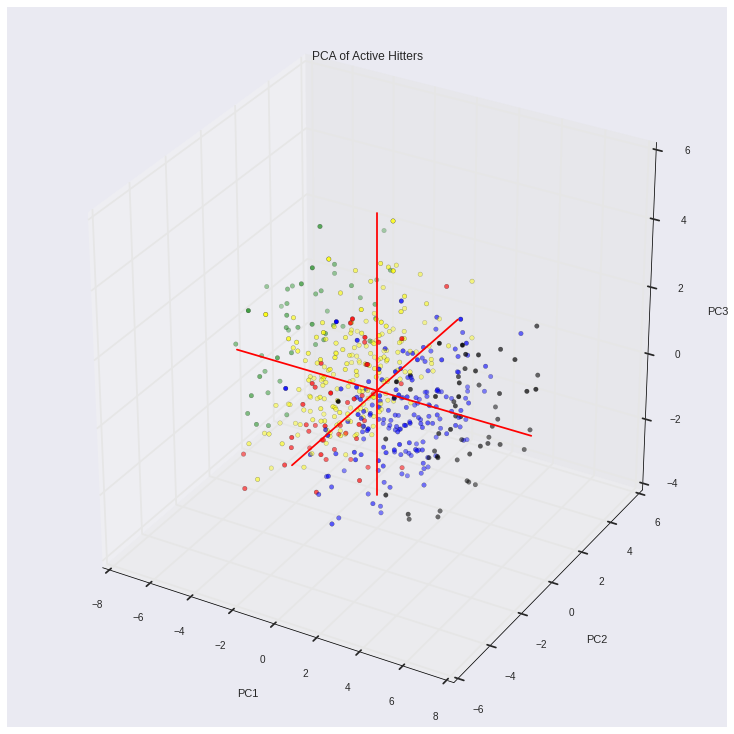

In [11]:
#############################
# additionally, plot a pca in 3d, using the color coding and class labels we derived
#############################
from matplotlib.mlab import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca_1 = PCA(X_conditional, standardize=True)

#fraction of variance explained by PCs?
print pca_1.fracs
# pca_1.Y.shape is a 2d array of the data projected into PCA space
print pca_1.Y.shape 

# compile the coordinates for plotting:
x = []
y = []
z = []
for item in pca_1.Y:
    x.append(item[0])
    y.append(item[1])
    z.append(item[2])

fig1 = plt.figure(figsize=(10, 10)) # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData = [x,y,z] 
print len(allCol)
print len(pltData[0])
ax.scatter(pltData[0], pltData[1], pltData[2], c=allCol ) # make a scatter plot of blue dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
ax.set_xlabel("PC1") 
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA of Active Hitters")
plt.show() # show the plot


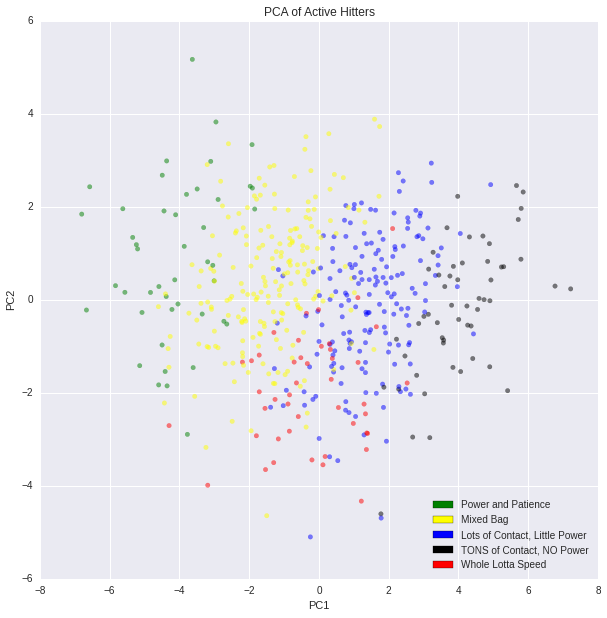

In [13]:
#############################
# a cleaner looking pca plot in 2d:
#############################
import matplotlib.patches as mpatches

recs = []
for i in range(0,len(classColors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=classColors[i]))
    
x = []
y = []
for item in pca_1.Y:
    x.append(item[0])
    y.append(item[1])

    
# Create a Figure object.
fig = plt.figure(figsize=(10, 10))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(x,y,color=allCol, alpha=0.5)
ax.set_title("PCA of Active Hitters")
# Add some axis labels.
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend(recs,classes,loc=4)
plt.show()


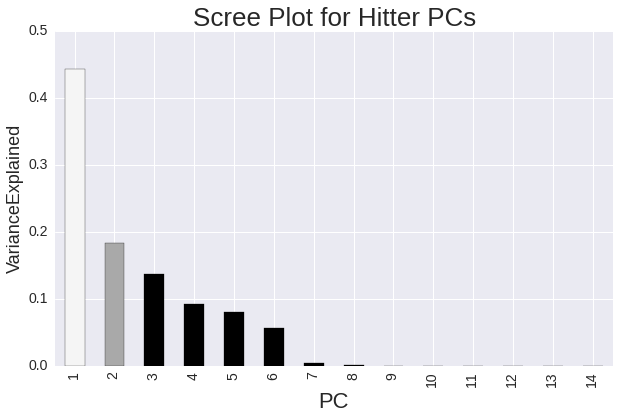

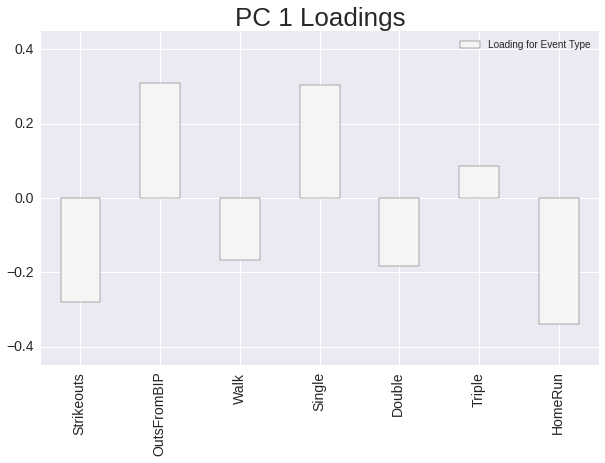

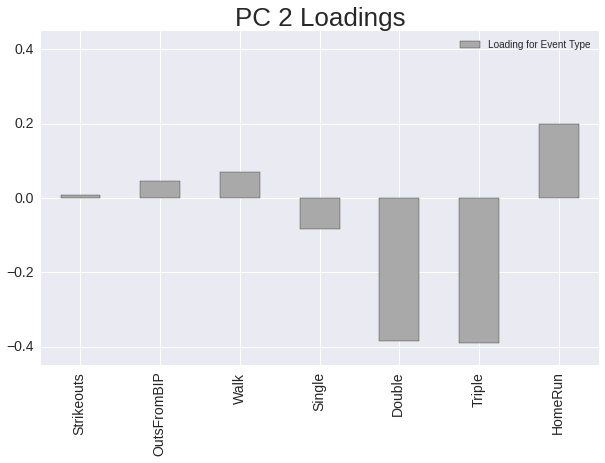

In [16]:
#############################
# finally, we'd lke to to see a scree plot 
# as well as the loadings for each event with PC1, PC2
#############################

dfTmp = pd.DataFrame({ 'VarianceExplained' : pca_1.fracs, 'PC' : range(1,len(pca_1.fracs)+1)  })
ax= dfTmp.plot(x='PC', y='VarianceExplained', kind='bar', figsize=(10, 6), title='Scree Plot for Hitter PCs',  ylim = (0,.5),
              color=['whitesmoke','darkgray', 'black','black','black','black','black','black','black','black','black','black','black','black'],
              legend=False, fontsize=14)  
ax.set_xlabel('PC', fontsize=22)
ax.set_ylabel('VarianceExplained', fontsize=18)
plt.title('Scree Plot for Hitter PCs', fontsize=26)
plt.show() 


#should compare to the league-wide rate of each event, for computing enrichment- DO NOT weight the 9 subtypes evenly,
#since some represent many more (or fewer) players thatn other subtypes...
leagueWideMean = X_reordered.mean()
leagueWideStd = X_reordered.std()

p=pd.DataFrame({ 'Loading for Event Type' : pca_1.Wt[0][:7] , 'Events' : X_conditional.columns.values[:7] })
ax = p.plot(x="Events", y="Loading for Event Type", kind="bar", figsize=(10, 6), ylim = (-0.45,.45) ,
           color='whitesmoke', fontsize=14  )
ax.set_xlabel('', fontsize=18)
plt.title('PC 1 Loadings', fontsize=26)
plt.show() 


p=pd.DataFrame({ 'Loading for Event Type' : pca_1.Wt[1][:7] , 'Events' : X_conditional.columns.values[:7] })
ax = p.plot(x="Events", y="Loading for Event Type", kind="bar", figsize=(10, 6), ylim = (-0.45,.45), 
           color='darkgray', fontsize=14 )
ax.set_xlabel('', fontsize=18)
plt.title('PC 2 Loadings', fontsize=26)
plt.show() 


# Part 5: Plots for each individual hitter- cluster membership and event tendencies

In [17]:
# custon methods for creating hitter-based radar plots:
#test some custom made methods for creating radar plots:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics

def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables, size=22)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin

            # this line prints the axis labels... second line turns them off...
            #ax.set_rgrids(grid, labels=gridlabel,angle=angles[i])
            ax.set_rgrids(grid, labels=[""*len(gridlabel)],angle=angles[i])
            
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)


/opt/conda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/opt/conda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


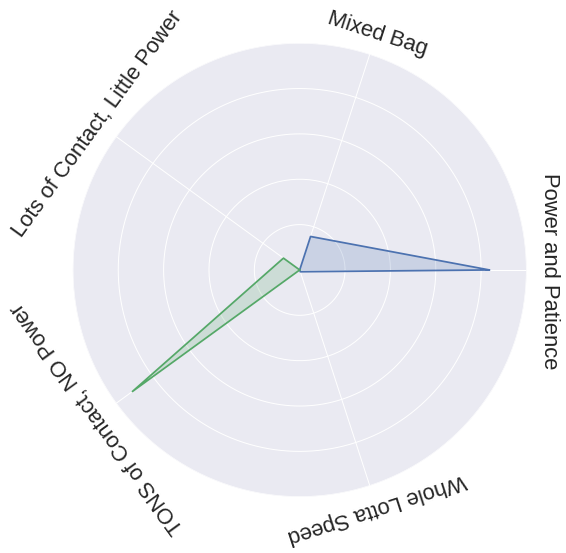

In [18]:
# test plot for trout and ichiro (take a guess which is which??):
variables = classes 
indices = list(dat.index.values)
i = indices.index(545361)
j = indices.index(400085)
data1 = probWeights[i]
data2 = probWeights[j]
ranges = [(1.0e-50, 1), (1.0e-50, 1), (1.0e-50, 1), (1.0e-50, 1),
          (1.0e-50, 1) ]
# plotting
fig1 = plt.figure(figsize=(7, 7))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data1)
radar.fill(data1, alpha=0.2)
radar.plot(data2)
radar.fill(data2, alpha=0.2)
plt.show()    


In [ ]:
# generate all of the radar plots for the hitters:
ranges = [(1.0e-50, 1), (1.0e-50, 1), (1.0e-50, 1), (1.0e-50, 1),
          (1.0e-50, 1) ]          
variables = classes

hitterIDs = list(dat.index.values)
for i in range(0,len(hitterIDs)):
    print hitterIDs[i]
    hitterData = probWeights[i]
    fig1 = plt.figure(figsize=(6, 6))
    radar = ComplexRadar(fig1, variables, ranges)
    radar.plot(hitterData)
    radar.fill(hitterData, alpha=0.2)
    outFileName= "/home/vagrant/capstoneProject/Analysis/Figures/RadarPlots/radar_" + str(hitterIDs[i]) + ".png"
    fig1.savefig(outFileName, bbox_inches='tight')


In [ ]:
# also create enrichment plots for each hitter- and reorder the columns firstto make it more intuitive:
X_reordered = X_conditional[ [0,2,1,3,4,5,6]  ].copy(deep=True)
events = X_reordered.columns.values
leagueWideMean = X_reordered.mean()
leagueWideStd = X_reordered.std()
hitterIDs = list(X_reordered.index.values)
for i in range(0,len(hitterIDs)):
    print hitterIDs[i]
    hitterStats = X_reordered.iloc[i].as_matrix()
    allZ = (hitterStats-leagueWideMean)/leagueWideStd
    allZ
    p=pd.DataFrame({ 'Z Score for Event Type' : allZ , 'Events' : events  })
    ax = p.plot(x="Events", y="Z Score for Event Type", kind="bar", ylim=(-3,3), 
           title= "", legend = False,  fontsize=20 )
    ax.set_xlabel("")
    ax.set_ylabel("Z Score",  fontsize=26 )    
    fig1 = ax.get_figure()
    outFileName= "/home/vagrant/capstoneProject/Analysis/Figures/HitterEventEnrichments/eventEnrichment_" + str(hitterIDs[i]) + ".png"
    fig1.savefig(outFileName, bbox_inches='tight')

# Part 6: Park effects

In [ ]:
# next we want to identify explicitly the hitter types that are favored in each park (relative to an average park).
# this has to be handled carefully- we will need to aggregate a hitters full stat line using abase run estimator or 
# something similar, and want to also include handedness in this calculation. Additionally, the normalization here 
# needs to be done properly- so for a given hitting type, we need to take all event outcomes for hitters assigned to 
# that type, for games IN THIS PARK, DIVIDED BY the pooled set of stats for that subtype in the ROAD GAMES for this parks team.
# this effectively accounts for biases of the home teams hittting and pitching strengths.

# workflow will be something like:
#    for each park, pull all the events for this teams home/road games, as well as LHH/RHH; store all 4 separately
#    filter the event tables to include only hitters for whom we have labels for
#    for each of the analyses, create a stat line for this parks IN PARK/OUT OF PARK data
#    for each unique hitter in the data subset, aggregate all of his plate appearances, and for each hiter subtype,
#        add his pooled stats proportionally to the vectors maintained for that subtype, based on his weighting in that class
#    once this is done, there is a final vector of event outcomes both IN/OUT of park, for each hitting type
#    aggregate this into a summary stat of BR/PA or something similar, for each type.
#    finally, compute the log fold change of HittingEff_Home / HittingEff_Away for each subtype 

In [20]:
# I generated this table in R- it includes the handedness and names for each hitter that is missing from 
# the event based file(s) loaded earlier. These will be necessary fields to pull in for the future output
import pandas as pd
Events=pd.read_csv( "/home/vagrant/capstoneProject/Analysis/EventTableWithHitterNamesAndHandedness.txt",sep="\t",index_col=0)
print Events.shape
print Events.head()


(948777, 15)
                                    GAME_ID  PIT_ID  BAT_ID HOME_TEAM_ID  \
numericDate                                                                
20100404     gid_2010_04_04_nyamlb_bosmlb_1  282332  453056          BOS   
20100404     gid_2010_04_04_nyamlb_bosmlb_1  282332  456030          BOS   
20100404     gid_2010_04_04_nyamlb_bosmlb_1  282332  400121          BOS   
20100404     gid_2010_04_04_nyamlb_bosmlb_1  282332  425903          BOS   
20100404     gid_2010_04_04_nyamlb_bosmlb_1  282332  120074          BOS   

            AWAY_TEAM_ID  BAT_HOME_ID  BAT_LINEUP_ID  EVENT_CD  DP_FL  TP_FL  \
numericDate                                                                    
20100404             NYY            1              1         2  False  False   
20100404             NYY            1              2         3  False  False   
20100404             NYY            1              3         2  False  False   
20100404             NYY            1              4  

In [21]:
# For refernece, event codes are:
#3 =  K
#2 =  Out
#19 = IBB?
#14 = BB?
#20 = 1b
#21 = 2b
#22 = 3b
#23 = HR

#extract only the event types we are interested in:
filter = [ e in [3, 2, 19, 14,  20, 21, 22, 23] for e in Events['EVENT_CD'] ]
Events=Events[ filter ]
print Events.shape

#remove the "bad" parks- allstar games and old teams:
filter = [ e not in ["AL", "NL", "FLA"] for e in Events['HOME_TEAM_ID'] ]
Events=Events[ filter ]
print Events.shape

#filter down to the set of batters we have already profiled:
filter = [ e in dat.index for e in Events['BAT_ID'] ]
print sum(filter)
Events=Events[ filter ]
print Events.shape

filter = [ e in ["L"] for e in Events['BAT_HANDEDNESS' ] ]
print sum(filter)
Events_LHH=Events[ filter  ]
filter = [ e in ["R"] for e in Events['BAT_HANDEDNESS' ] ]
print sum(filter)
Events_RHH=Events[ filter  ]


(907764, 15)
(895313, 15)
783930
(783930, 15)
136057
647873


In [22]:
# GPA run estimator, from: http://www.hardballtimes.com/the-great-run-estimator-shootout-part-1/
# 'stats' input is a list with: K, outBIP, W, 1b, 2b, 3b, HR
def getGPA( stats ):
    OBP = (stats[2]+stats[3]+stats[4]+stats[5]+stats[6])/sum(stats)
    SLG = (stats[3]+2*stats[4]+3*stats[5]+4*stats[6])/(sum(stats)-stats[2])
    return ((1.8*OBP) + SLG)/4


In [23]:
##################################
# RHH
##################################

#    for each park, pull all the events for this teams home/road games, as well as LHH/RHH; store all 4 separately
#    filter the event tables to include only hitters for whom we have labels for
#    for each of the analyses, create a stat line for this parks IN PARK/OUT OF PARK data
#    for each unique hitter in the data subset, aggregate all of his plate appearances, and for each hiter subtype,
#        add his pooled stats proportionally to the vectors maintained for that subtype, based on his weighting in that class
#    once this is done, there is a final vector of event outcomes both IN/OUT of park, for each hitting type
#    aggregate this into a summary stat of BR/PA or something similar, for each type.
#    finally, compute the log fold change of HittingEff_Home / HittingEff_Away for each subtype 


#3 =  K
#2 =  Out
#19 = IBB?
#14 = BB?
#20 = 1b
#21 = 2b
#22 = 3b
#23 = HR
isNotPrecomputed = True
n = 5

allTeams = set(Events_RHH['HOME_TEAM_ID'])
allInParkProfilesByEventProbs_RHH = []
allOutOfParkProfilesByEventProbs_RHH = []
allOutOfParkProfilesBySummaryStats_RHH = []
allInParkProfilesBySummaryStats_RHH = []
allLogRatioPerformance_RHH = []

len(allTeams)
for t in allTeams:
    #t='BOS'
    print t
    
    if isNotPrecomputed:
        inParkEvents = Events_RHH[ Events_RHH['HOME_TEAM_ID']==t  ]
        outOfParkEvents = Events_RHH[ Events_RHH['AWAY_TEAM_ID']==t  ]
    
        # create a new container, for both in park and out of park:
        inPark_eventMatrix = np.zeros(( dat.shape[1] , probWeights.shape[1]))
        outOfPark_eventMatrix = np.zeros(( dat.shape[1] , probWeights.shape[1]))    
    
        #for in park:
        allHitters = set(inParkEvents['BAT_ID'])
        for h in allHitters:
            #get all events for this hitter (do not convert to frequency):       
            hitterInPark = inParkEvents[ inParkEvents[ 'BAT_ID' ] == h ]
            hitterStatLine = [sum(hitterInPark['EVENT_CD']==3),
                          sum(hitterInPark['EVENT_CD']==2),
                          sum(hitterInPark['EVENT_CD']==19)+sum(hitterInPark['EVENT_CD']==14),
                          sum(hitterInPark['EVENT_CD']==20),
                          sum(hitterInPark['EVENT_CD']==21),
                          sum(hitterInPark['EVENT_CD']==22),
                          sum(hitterInPark['EVENT_CD']==23)
                          ]    
            #get the weighted class assignment for this hitter, 
            probWeightsForHitter = probWeights[ X_conditional.index == h ]
            #print [probWeightsForHitter[0][0] * h for h in hitterStatLine ]
            for p in range(0,len(probWeightsForHitter[0])):
                inPark_eventMatrix[:,p] = np.add(inPark_eventMatrix[:,p], 
                                             np.asarray([probWeightsForHitter[0][p] * h for h in hitterStatLine ]) )
        
        allInParkProfilesByEventProbs_RHH.append(inPark_eventMatrix)
        tmp = pd.DataFrame(inPark_eventMatrix, index=['Strikeouts', 'OutsFromBIP', 'Walk', 'Single', 'Double', 'Triple', 'HomeRun'], 
                   columns=classes)#, 'C5','C6', 'C7','C8', 'C9','C10', 'C11','C12', 'C13','C14'])
        tmp.to_csv("/home/vagrant/capstoneProject/Analysis/EventsInPark_" + t + ".txt" , sep="\t"   )
        
        #for out of park:
        allHitters = set(outOfParkEvents['BAT_ID'])
        for h in allHitters:
            #get all events for this hitter (do not convert to frequency):       
            hitterInPark = outOfParkEvents[ outOfParkEvents[ 'BAT_ID' ] == h ]
            hitterStatLine = [sum(hitterInPark['EVENT_CD']==3),
                          sum(hitterInPark['EVENT_CD']==2),
                          sum(hitterInPark['EVENT_CD']==19)+sum(hitterInPark['EVENT_CD']==14),
                          sum(hitterInPark['EVENT_CD']==20),
                          sum(hitterInPark['EVENT_CD']==21),
                          sum(hitterInPark['EVENT_CD']==22),
                          sum(hitterInPark['EVENT_CD']==23)
                          ]    
            #get the weighted class assignment for this hitter, 
            probWeightsForHitter = probWeights[ X_conditional.index == h ]
            for p in range(0,len(probWeightsForHitter[0])):
                outOfPark_eventMatrix[:,p] = np.add(outOfPark_eventMatrix[:,p], 
                                             np.asarray([probWeightsForHitter[0][p] * h for h in hitterStatLine ]) )
        
        allOutOfParkProfilesByEventProbs_RHH.append(outOfPark_eventMatrix)
        tmp = pd.DataFrame(outOfPark_eventMatrix, index=['Strikeouts', 'OutsFromBIP', 'Walk', 'Single', 'Double', 'Triple', 'HomeRun'], 
                   columns=classes)#, 'C5','C6', 'C7','C8', 'C9','C10', 'C11','C12', 'C13','C14'])
        tmp.to_csv("/home/vagrant/capstoneProject/Analysis/EventsOutOfPark_" + t + ".txt" , sep="\t"   )
    
    else:
        outOfPark_eventMatrix = pd.read_csv("/home/vagrant/capstoneProject/Analysis/EventsOutOfPark_" + t + ".txt" , sep="\t" , index_col = 0)
        inPark_eventMatrix = pd.read_csv("/home/vagrant/capstoneProject/Analysis/EventsInPark_" + t + ".txt" , sep="\t" , index_col = 0)
        print "NOT CONFIGURED"
        # must convert this to a numpy array- have not figured this out yet...
        
    #get the summary stat for example, BR/PA, for each subtype, and write this to disk as well:
    tmp1 = []
    for i in range(0,   n   ):
        tmp1.append(getGPA(  inPark_eventMatrix[:, i]  ))
    allInParkProfilesBySummaryStats_RHH.append(tmp1)  
    #print allInParkProfilesBySummaryStats_RHH
    
    #get the summary stat for example, BR/PA, for each subtype, and write this to disk as well:
    tmp2 = []
    for i in range(0,  n  ):
        tmp2.append( getGPA(  outOfPark_eventMatrix[:, i]  ) )
    allOutOfParkProfilesBySummaryStats_RHH.append(tmp2)
    
    #compute the log ratio in this park, for each subtype:
    tmp3 = []
    for i in range(0,len(probWeightsForHitter[0])):
        tmp3.append( np.log2( tmp1[i] / tmp2[i]) )
    allLogRatioPerformance_RHH.append( tmp3 )
    
 

NYY
MIL
MIN
TOR
WSH
ATL
BOS
DET
CIN
NYM
BAL
COL
TEX
MIA
SEA
CLE
TB
CHC
STL
OAK
CWS
HOU
KC
PHI
LAD
PIT
LAA
ARI
SF
SD


In [24]:
##################################
# LHH
##################################

#    X for each park, pull all the events for this teams home/road games, as well as LHH/RHH; store all 4 separately
#    X filter the event tables to include only hitters for whom we have labels for
#    X for each of the analyses, create a stat line for this parks IN PARK/OUT OF PARK data
#    for each unique hitter in the data subset, aggregate all of his plate appearances, and for each hiter subtype,
#        add his pooled stats proportionally to the vectors maintained for that subtype, based on his weighting in that class
#    once this is done, there is a final vector of event outcomes both IN/OUT of park, for each hitting type
#    aggregate this into a summary stat of BR/PA or something similar, for each type.
#    finally, compute the log fold change of HittingEff_Home / HittingEff_Away for each subtype 

#3 =  K
#2 =  Out
#19 = IBB?
#14 = BB?
#20 = 1b
#21 = 2b
#22 = 3b
#23 = HR
n = 5

#use the same team order as was used for RHH!!! so that indeces of outputs will be identical
allTeams = set(Events_RHH['HOME_TEAM_ID'])
allInParkProfilesByEventProbs_LHH = []
allOutOfParkProfilesByEventProbs_LHH = []

allOutOfParkProfilesBySummaryStats_LHH = []
allInParkProfilesBySummaryStats_LHH = []

allLogRatioPerformance_LHH = []

len(allTeams)
for t in allTeams:
    #t='BOS'
    print t
    inParkEvents = Events_LHH[ Events_LHH['HOME_TEAM_ID']==t  ]
    outOfParkEvents = Events_LHH[ Events_LHH['AWAY_TEAM_ID']==t  ]
    
    # create a new container, for both in park and out of park:
    inPark_eventMatrix = np.zeros(( dat.shape[1] , probWeights.shape[1]))
    outOfPark_eventMatrix = np.zeros(( dat.shape[1] , probWeights.shape[1]))    
    
    #for in park:
    allHitters = set(inParkEvents['BAT_ID'])
    for h in allHitters:
        #get all events for this hitter (do not convert to frequency):       
        hitterInPark = inParkEvents[ inParkEvents[ 'BAT_ID' ] == h ]
        hitterStatLine = [sum(hitterInPark['EVENT_CD']==3),
                          sum(hitterInPark['EVENT_CD']==2),
                          sum(hitterInPark['EVENT_CD']==19)+sum(hitterInPark['EVENT_CD']==14),
                          sum(hitterInPark['EVENT_CD']==20),
                          sum(hitterInPark['EVENT_CD']==21),
                          sum(hitterInPark['EVENT_CD']==22),
                          sum(hitterInPark['EVENT_CD']==23)
                          ]    

        #get the weighted class assignment for this hitter, 
        probWeightsForHitter = probWeights[ X_conditional.index == h ]
        #print [probWeightsForHitter[0][0] * h for h in hitterStatLine ]
        for p in range(0,len(probWeightsForHitter[0])):
            inPark_eventMatrix[:,p] = np.add(inPark_eventMatrix[:,p], 
                                             np.asarray([probWeightsForHitter[0][p] * h for h in hitterStatLine ]) )
        
    allInParkProfilesByEventProbs_LHH.append(inPark_eventMatrix)
    tmp = pd.DataFrame(inPark_eventMatrix, index=['Strikeouts', 'OutsFromBIP', 'Walk', 'Single', 'Double', 'Triple', 'HomeRun'], 
                   columns=['C0', 'C1','C2', 'C3','C4'])#, 'C5','C6', 'C7','C8', 'C9','C10', 'C11','C12', 'C13','C14'])
    tmp.to_csv("/home/vagrant/capstoneProject/Analysis/EventsInPark_" + t + "_LHH.txt" , sep="\t"   )

    #get the summary stat for example, BR/PA, for each subtype, and write this to disk as well:
    tmp1 = []
    for i in range(0,len(probWeightsForHitter[0])):
        tmp1.append(getGPA(  inPark_eventMatrix[:, i]  ))
    allInParkProfilesBySummaryStats_LHH.append(tmp1)  
    #print allInParkProfilesBySummaryStats_RHH
    
    #for out of park:
    allHitters = set(outOfParkEvents['BAT_ID'])
    for h in allHitters:
        #get all events for this hitter (do not convert to frequency):       
        hitterInPark = outOfParkEvents[ outOfParkEvents[ 'BAT_ID' ] == h ]
        hitterStatLine = [sum(hitterInPark['EVENT_CD']==3),
                          sum(hitterInPark['EVENT_CD']==2),
                          sum(hitterInPark['EVENT_CD']==19)+sum(hitterInPark['EVENT_CD']==14),
                          sum(hitterInPark['EVENT_CD']==20),
                          sum(hitterInPark['EVENT_CD']==21),
                          sum(hitterInPark['EVENT_CD']==22),
                          sum(hitterInPark['EVENT_CD']==23)
                          ]    
        #get the weighted class assignment for this hitter, 
        probWeightsForHitter = probWeights[ X_conditional.index == h ]
        for p in range(0,len(probWeightsForHitter[0])):
            outOfPark_eventMatrix[:,p] = np.add(outOfPark_eventMatrix[:,p], 
                                             np.asarray([probWeightsForHitter[0][p] * h for h in hitterStatLine ]) )
        
    allOutOfParkProfilesByEventProbs_LHH.append(outOfPark_eventMatrix)
    tmp = pd.DataFrame(outOfPark_eventMatrix, index=['Strikeouts', 'OutsFromBIP', 'Walk', 'Single', 'Double', 'Triple', 'HomeRun'], 
                   columns=['C0', 'C1','C2', 'C3','C4'])#, 'C5','C6', 'C7','C8', 'C9','C10', 'C11','C12', 'C13','C14'])
    tmp.to_csv("/home/vagrant/capstoneProject/Analysis/EventsOutOfPark_" + t + "_LHH.txt" , sep="\t"   )
    
    #get the summary stat for example, BR/PA, for each subtype, and write this to disk as well:
    tmp2 = []
    for i in range(0,len(probWeightsForHitter[0])):
        tmp2.append( getGPA(  outOfPark_eventMatrix[:, i]  ) )
    allOutOfParkProfilesBySummaryStats_LHH.append(tmp2)

    
    #compute the log ratio in this park, for each subtype:
    tmp3 = []
    for i in range(0,len(probWeightsForHitter[0])):
        tmp3.append( np.log2( tmp1[i] / tmp2[i]) )
    allLogRatioPerformance_LHH.append( tmp3 )
 

NYY
MIL
MIN
TOR
WSH
ATL
BOS
DET
CIN
NYM
BAL
COL
TEX
MIA
SEA
CLE
TB
CHC
STL
OAK
CWS
HOU
KC
PHI
LAD
PIT
LAA
ARI
SF
SD


In [ ]:
# plot the performance change for RHH in each park, for all subptypes, using a barplot:
for i in range(30):
    p=pd.DataFrame({ 'Performance Change for RHH in Park' : allLogRatioPerformance_RHH[i] , 'Hitting Types' : classes  })
    
    ax = p.plot(x="Hitting Types", y="Performance Change for RHH in Park", kind="bar", ylim=(-0.35,0.35), 
           title='' , legend = False,  fontsize=16 )
    ax.set_xlabel("")
    ax.set_ylabel("Fold Change in Park (Runs Created)",  fontsize=16 )  
    ax.set_title(list(allTeams)[i] + ', RHH Performance by Hitter Class', fontsize=22)
    fig1 = ax.get_figure()
    outFileName= "/home/vagrant/capstoneProject/Analysis/Figures/ParkEfficiencyEnrichments/parkEnrichmentRHH_" + list(allTeams)[i] + ".png"
    fig1.savefig(outFileName, bbox_inches='tight')


In [ ]:
# plot the performance change for LHH in each park, for all subptypes, using a barplot:
for i in range(30):
    p=pd.DataFrame({ 'Performance Change for LHH in Park' : allLogRatioPerformance_LHH[i] , 'Hitting Types' : classes  })
    
    ax = p.plot(x="Hitting Types", y="Performance Change for LHH in Park", kind="bar", ylim=(-0.35,0.35), 
           title='' , legend = False,  fontsize=16 )
    ax.set_xlabel("")
    ax.set_ylabel("Fold Change in Park (Runs Created)",  fontsize=16 )  
    ax.set_title(list(allTeams)[i] + ', LHH Performance by Hitter Class', fontsize=22)
    fig1 = ax.get_figure()
    outFileName= "/home/vagrant/capstoneProject/Analysis/Figures/ParkEfficiencyEnrichments/parkEnrichmentLHH_" + list(allTeams)[i] + ".png"
    fig1.savefig(outFileName, bbox_inches='tight')


In [ ]:
# Finally, create radar plot for  each park- this involves hacking the prevos radar code a bit:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics

def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar_parkBased():
    def __init__(self, fig, variables, ranges, axLabPostMap,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables, size=22)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            
            

            # this line prints the axis labels... second line turns them off...
            ax.set_rgrids(grid, labels=axLabPostMap,angle=angles[i])
            #ax.set_rgrids(grid, labels=[""*len(gridlabel)],angle=angles[i])
            
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)



[-0.14480762968740279, 0.10729059832849824, 0.047359197557171259, 0.091606929556664524, 0.032947877763677913]
[-0.12176463114859941, -0.019702264819208368, 0.023496504975334131, 0.029761389730573705, 0.19332231584534834]
-0.144807629687
0.193322315845
[0.30000100000000002, 1.0455671095579686, 0.86832341504608435, 0.99918355501321265, 0.82570275992845743]
[0.36814935196716247, 0.66999297060491281, 0.79775086476740509, 0.81627890358209432, 1.300001]


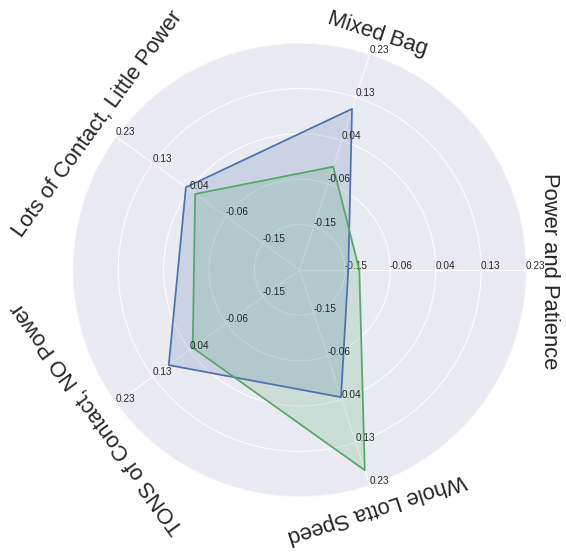

In [27]:
# heres an example radar plot for park:

variables = classes 
data1 = allLogRatioPerformance_RHH[1] 
data2 = allLogRatioPerformance_LHH[1] 
print data1
print data2

# SCALE THE DATA AND AXES TO A BUFFERED RANGE
minVal = np.min( [np.min(data1) , np.min(data2) ] )
print minVal
maxVal = np.max( [np.max(data1) , np.max(data2) ] )
print maxVal
numToSubtract = minVal
numToDivideBy = (maxVal-minVal)
data1_norm = [ ((i-numToSubtract)/numToDivideBy)+0.300001 for i in data1]
data2_norm = [ ((i-numToSubtract)/numToDivideBy)+0.300001 for i in data2]
print data1_norm
print data2_norm

# now for the 5 non-origin axis labels, map them back to original space:
axLabPreMap = [0, .28, .56, .84, 1.12, 1.4]
axLabPostMap = [ ((i-0.3000001)*numToDivideBy)+numToSubtract  for i in axLabPreMap] 
axLabPostMap = ["{}".format(round(x,2)) for x in axLabPostMap]
axLabPostMap[0] = ''

#need to hack this a bit- use a range of 0-1, convert the input data to this range, and then hand 
# the plotting fucntion a custom label for axes...
ranges = [(1.0e-50, 1.4), (1.0e-50, 1.4), (1.0e-50, 1.4), (1.0e-50, 1.4),
          (1.0e-50, 1.4) ]

# plotting
fig1 = plt.figure(figsize=(7, 7))
radar = ComplexRadar_parkBased(fig1, variables, ranges, axLabPostMap)
radar.plot(data1_norm)
radar.fill(data1_norm, alpha=0.2)
radar.plot(data2_norm)
radar.fill(data2_norm, alpha=0.2)
plt.show()    



In [ ]:
# now do this for all parks, and save the output:
ranges = [(1.0e-50, 1.4), (1.0e-50, 1.4), (1.0e-50, 1.4), (1.0e-50, 1.4),
          (1.0e-50, 1.4) ]
variables = classes

for j in range(0,len(allLogRatioPerformance_RHH)):    

    data1 = allLogRatioPerformance_RHH[j] 
    data2 = allLogRatioPerformance_LHH[j] 
    print data1
    print data2
    minVal = np.min( [np.min(data1) , np.min(data2) ] )
    print minVal
    maxVal = np.max( [np.max(data1) , np.max(data2) ] )
    print maxVal
    numToSubtract = minVal
    numToDivideBy = (maxVal-minVal)
    data1_norm = [ ((i-numToSubtract)/numToDivideBy)+0.300001 for i in data1]
    data2_norm = [ ((i-numToSubtract)/numToDivideBy)+0.300001 for i in data2]
    print data1_norm
    print data2_norm

    # now for the 5 non-origin axis labels, map them back to original space:
    axLabPreMap = [0, .28, .56, .84, 1.12, 1.4]
    axLabPostMap = [ ((i-0.3000001)*numToDivideBy)+numToSubtract  for i in axLabPreMap] 
    axLabPostMap = ["{}".format(round(x,2)) for x in axLabPostMap]
    axLabPostMap[0] = ''

    # plotting
    fig1 = plt.figure(figsize=(7, 7))
    radar = ComplexRadar(fig1, variables, ranges, axLabPostMap)
    radar.plot(data1_norm)
    radar.fill(data1_norm, alpha=0.2)
    radar.plot(data2_norm)
    radar.fill(data2_norm, alpha=0.2)
    outFileName= "/home/vagrant/capstoneProject/Analysis/Figures/ParkRadarPlots/parkRadar_" + list(allTeams)[j] + ".png"
    fig1.savefig(outFileName, bbox_inches='tight')



# Part 7: Heatmap of hitter event frequncies using bokeh (and javascript)

In [35]:
###############################################################################
###############################################################################
##
##
## CREATE THE INTERACTIVE HEATMAP
##
##
###############################################################################
###############################################################################

In [28]:
import pandas as pd
import numpy as np
data=pd.read_csv( "/home/vagrant/capstoneProject/Analysis/data_noNorm_postClusteringUsingCluster3.txt",sep="\t",index_col=0)
print np.max(data)
print np.min(data)
print max(np.max(data))
print min(np.min(data))

diffRange = max(np.max(data)) - min(np.min(data))
print diffRange

Strikeouts     0.123918
Walk           0.134308
OutsFromBIP    0.107763
Single         0.159846
Double         0.118815
Triple         0.217123
HomeRun        0.144812
dtype: float64
Strikeouts    -0.101293
Walk          -0.090603
OutsFromBIP   -0.138521
Single        -0.121984
Double        -0.144188
Triple        -0.048990
HomeRun       -0.078396
dtype: float64
0.217123
-0.144188
0.361311


In [29]:
#create hex scale for heatmap:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

ramp = sns.diverging_palette(220, 20, n=501)
allColorsHex = []
for i in ramp:
    allColorsHex.append( rgb2hex(i) )
print allColorsHex[:10]

[u'#3f7f93', u'#3f7f93', u'#408094', u'#408094', u'#428195', u'#428195', u'#438295', u'#438295', u'#448396', u'#448396']


In [30]:
fullEventTable=pd.read_csv( "/home/vagrant/capstoneProject/Analysis/EventTableWithHitterNamesAndHandedness.txt",sep="\t",index_col=0)
fullEventTable.head()

,GAME_ID,PIT_ID,BAT_ID,HOME_TEAM_ID,AWAY_TEAM_ID,BAT_HOME_ID,BAT_LINEUP_ID,EVENT_CD,DP_FL,TP_FL,SF_FL,SH_FL,GBOUT_FL,BAT_NAME,BAT_HANDEDNESS
numericDate,,,,,,,,,,,,,,,
20100404,gid_2010_04_04_nyamlb_bosmlb_1,282332,453056,BOS,NYY,1,1,2,False,False,False,False,False,Jacoby Ellsbury,L
20100404,gid_2010_04_04_nyamlb_bosmlb_1,282332,456030,BOS,NYY,1,2,3,False,False,False,False,False,Dustin Pedroia,R
20100404,gid_2010_04_04_nyamlb_bosmlb_1,282332,400121,BOS,NYY,1,3,2,False,False,False,False,True,Victor Martinez,R
20100404,gid_2010_04_04_nyamlb_bosmlb_1,282332,425903,BOS,NYY,1,4,21,False,False,False,False,False,Kevin Youkilis,R
20100404,gid_2010_04_04_nyamlb_bosmlb_1,282332,120074,BOS,NYY,1,5,2,False,False,False,False,True,David Ortiz,L


In [31]:
# now create the data structure:

allHitters = data.index.values
eventTypes=data.columns.values.tolist()
hitters=[]
events=[]
eventprobs=[]
colors=[]
imagefile1=[]
imagefile2=[]

allHitters_str = []
hitterName=[]
hitterHandedness=[]
for h in allHitters:
    allHitters_str.append(str(h))
    ind = np.where(fullEventTable['BAT_ID']==h)[0][0]    
    hitterName.append(fullEventTable['BAT_NAME'].tolist()[ind])
    if fullEventTable['BAT_HANDEDNESS'].tolist()[ind] == "L":
        hitterHandedness.append("Left")
    elif fullEventTable['BAT_HANDEDNESS'].tolist()[ind] == "R":
        hitterHandedness.append("Right") 
    elif fullEventTable['BAT_HANDEDNESS'].tolist()[ind] == "S":
        hitterHandedness.append("Switch") 
    else:
        hitterHandedness.append("Unkown")            

hitterHandedness_all=[]
offSet =  min(np.min(data))
for e in eventTypes:
    for i in range(0,len(hitterName)):        
        hitters.append(str(hitterName[i]))
        hitterHandedness_all.append( hitterHandedness[i]  )
        events.append(e)
        h=allHitters[i]
        p = data[e][data.index.values==h].tolist()[0]
        eventprobs.append(p)
        # map to color:
        mappedIndex = int((p-offSet)*1384)
        #c = allColorsHex[min(int(p*500), 500)]
        mappedIndex = min(mappedIndex,500)
        mappedIndex = max(mappedIndex,0)
        c = allColorsHex[mappedIndex]
        colors.append(c)
        #imagefile.append('/home/vagrant/capstoneProject/Analysis/test.jpeg')
        #imagefile.append('file:///C:/Users/Matt/Desktop/dataIncubator/radarPlots/radar.png')
        radarName='file:///C:/Users/Matt/Desktop/dataIncubator/radarPlots/radar_' +  str(h)  + '.png'
        imagefile1.append(radarName)
        enrichmentName='file:///C:/Users/Matt/Desktop/dataIncubator/enrichmentPlots/eventEnrichment_' +  str(h)  + '.png'
        imagefile2.append(enrichmentName)


In [32]:
from math import pi
from bokeh.models import HoverTool
from bokeh.plotting import ColumnDataSource, figure, show, output_file
from bokeh.io import output_notebook

source = ColumnDataSource(
    data=dict(hitters=hitters, events=events, colors=colors, 
              eventprobs=eventprobs, imagefile1=imagefile1, imagefile2=imagefile2, hitterHandedness_all=hitterHandedness_all)
)

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <span style="font-size: 18px; font-weight: bold; clear: left">Player: @hitters</span>    
            </div>  
            <div style="clear: left"> 
                <span style="font-size: 18px; font-weight: bold; clear: left">Bats: @hitterHandedness_all</span>  
            </div>               
            <div style="clear: left">
                <img
                    src="@imagefile1" height="200" alt="@imagefile1" width="200"
                    style="float: left; margin: 0px 5px 5px 0px; clear: left"
                    border="1"
                ></img>     
                <img
                    src="@imagefile2" height="180" alt="@imagefile2" width="200"
                    style="float: left; margin: 0px 5px 5px 0px; clear: left"
                    border="1"
                ></img>                    
            </div>          
        </div>
        """
    )    
    
TOOLS = "pan,resize,hover,save,box_zoom,wheel_zoom"

p = figure(title="Event Probability For Active Hitters, 2010-2014",
           x_range=eventTypes, y_range=hitterName,
           x_axis_location="above", plot_width=900, plot_height=750,
           toolbar_location="left", tools=[hover])

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "15pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi/3
p.yaxis.visible = None
p.rect("events", "hitters", 1, 1, source=source,
       color="colors", line_color=None)




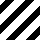
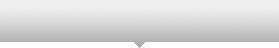
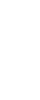
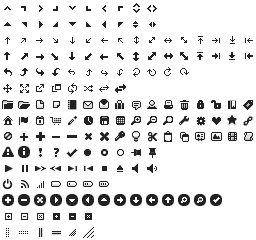
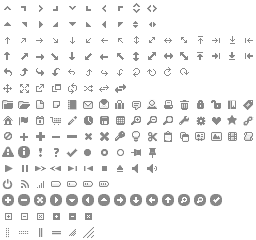
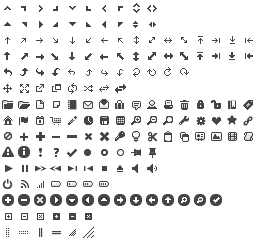
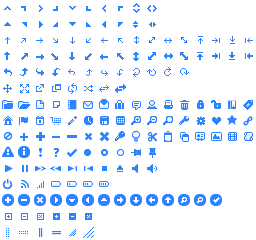
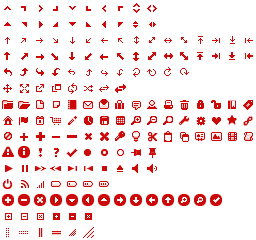
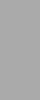
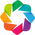
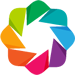
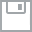
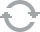
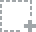
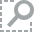
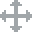
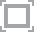
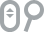

In [33]:
output_notebook()
# output_file("bokehtest.html")
show(p)